In [1]:
import sys
import os

# Useful only to use the local version of mmd_critic located in
# ../mmd_critic/
sys.path.append(os.path.abspath('..'))

In [2]:
from sklearn.datasets import make_blobs

n_samples = 50  # Total number of samples
centers = 4       # Number of clusters
cluster_std = 1 # Standard deviation of the clusters

X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, n_features=2, random_state=42)
X = X.tolist()

In [3]:
from mmd_critic import MMDCritic
from mmd_critic.kernels import RBFKernel

critic = MMDCritic(X, RBFKernel(1), RBFKernel(0.025))
protos, _ = critic.select_prototypes(centers)

In [4]:
criticisms, _ = critic.select_criticisms(10, protos)

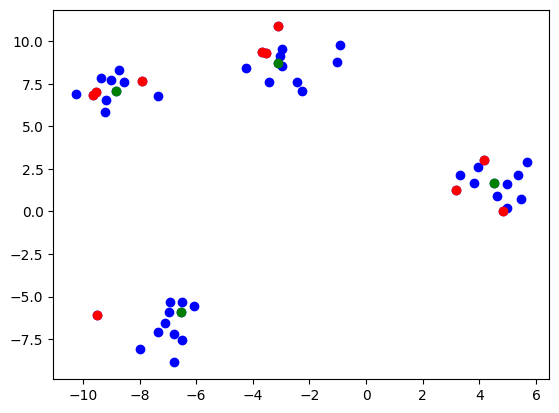

In [5]:
import matplotlib.pyplot as plt

def plot_blobs(protos, criticisms):
    x_coords = [point[0] for point in X]
    y_coords = [point[1] for point in X]

    # Plot the data points
    plt.scatter(x_coords, y_coords, color='blue', label='Data Points')

    # Plot prototypes in green
    proto_x, proto_y = zip(*protos)
    plt.scatter(proto_x, proto_y, color='green', label='Prototypes')

    crit_x, crit_y = zip(*criticisms)
    plt.scatter(crit_x, crit_y, color='red', label='Prototypes')

plot_blobs(protos, criticisms)

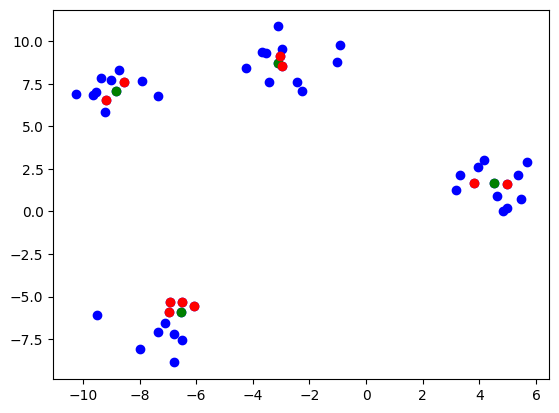

In [7]:
# An example of using only one kernel and why it works weird,
# at least in my experience

crit2 = MMDCritic(X, RBFKernel())
protos2, _ = crit2.select_prototypes(centers)
crits2, _ = crit2.select_criticisms(10, protos2)

plot_blobs(protos2, crits2)

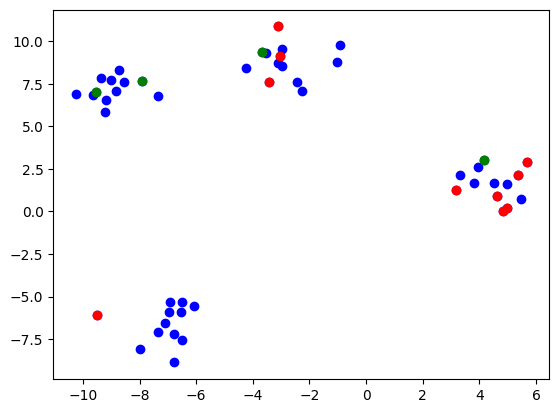

In [8]:
crit3 = MMDCritic(X, RBFKernel(0.025))
protos3, _ = crit3.select_prototypes(centers)
crits3, _ = crit3.select_criticisms(10, protos3)

plot_blobs(protos3, crits3)